## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [10]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val   = 'val'
test  = 'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 10000
# validation set size
nb_validation_samples = 1240
# test set size
nb_test_samples = 1250

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [25]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
#     +ReLu
model.add(Dense(32, activation='relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
#     +Sigmoid
model.add(Dense(1, activation='sigmoid'))

C:\Users\Ilia\ITMO_algorithms\machine_learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history_10 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


C:\Users\Ilia\ITMO_algorithms\machine_learning\.venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.5019 - loss: 0.6803 - val_accuracy: 0.5181 - val_loss: 0.6001
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.4986 - loss: 0.5982 - val_accuracy: 0.5090 - val_loss: 0.5212
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.5938 - loss: 0.5789 - val_accuracy: 0.4655 - val_loss: 0.5085
Epoch 4/10


C:\Users\Ilia\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.4978 - loss: 0.5560 - val_accuracy: 0.5123 - val_loss: 0.5040
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.5003 - loss: 0.5148 - val_accuracy: 0.4967 - val_loss: 0.4748
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.5312 - loss: 0.5662 - val_accuracy: 0.5345 - val_loss: 0.5085
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.5010 - loss: 0.4830 - val_accuracy: 0.5025 - val_loss: 0.4955
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.4963 - loss: 0.4556 - val_accuracy: 0.5058 - val_loss: 0.4514
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.5469 - loss: 0.4989 - val_accuracy: 0.5345 - val_loss: 0.3899
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.4977 - loss: 0.4401 - val_accuracy: 0.5058 - val_loss: 0.4600
Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.5101 - loss: 0.4359 - val_a

KeyboardInterrupt: 

In [28]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

# scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
scores = model.evaluate(test_generator)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5012 - loss: 0.3971
Accuracy on test data: 50.00%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

Accuracy of the  model =  0.89 



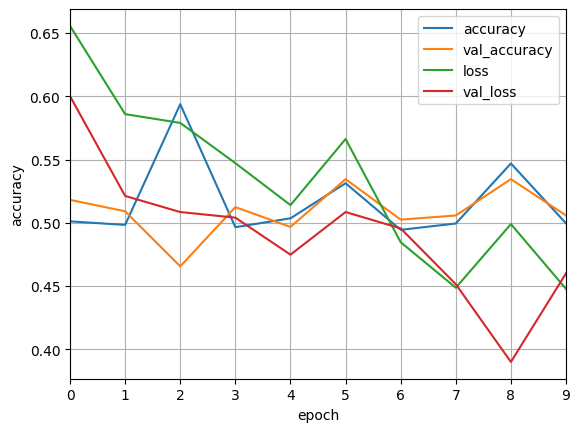

In [53]:
# summarize history for loss
# score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy of the  model = ', round(scores[1], 2), "\n")

# summarize history for loss
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.xlim(0, 9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

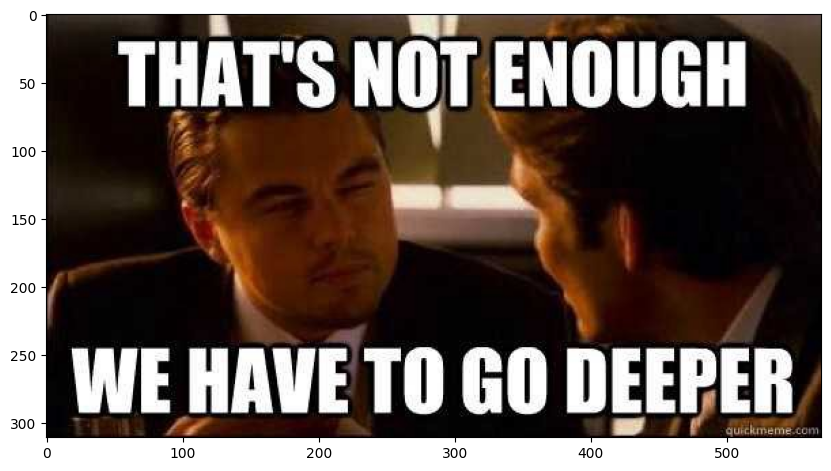

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('Deeper.jpeg')
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [32]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [45]:
# add layers to VGG16:

model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)

# + flattening
model_vgg16.add(Flatten())
# + Dense fullyconnected layer with 256 neuron
# + ReLu
model_vgg16.add(Dense(256, activation='relu'))
# + Dropout
model_vgg16.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
model_vgg16.compile(loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=1e-5),
                    metrics=['accuracy'])

E.g., it was like:


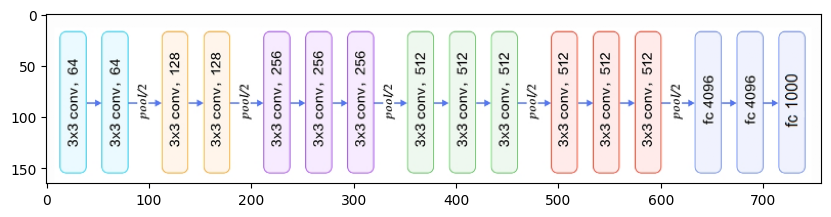

In [47]:
img = mpimg.imread('VGG16.png')
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.show()

and it becomes:

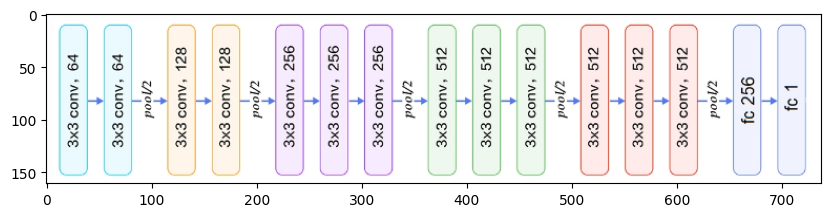

In [48]:
img = mpimg.imread('VGG162.png')
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.show()

In [49]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg16_12e = model_vgg16.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.5916 - loss: 0.6885 - val_accuracy: 0.8396 - val_loss: 0.4354
Epoch 2/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.7961 - loss: 0.4532 - val_accuracy: 0.8643 - val_loss: 0.3571
Epoch 3/12
  1/156 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.8594 - loss: 0.3554

C:\Users\Ilia\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8594 - loss: 0.3554 - val_accuracy: 0.8793 - val_loss: 0.3059
Epoch 4/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8401 - loss: 0.3731 - val_accuracy: 0.8766 - val_loss: 0.3284
Epoch 5/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.8516 - loss: 0.3392 - val_accuracy: 0.8766 - val_loss: 0.2991
Epoch 6/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8594 - loss: 0.2768 - val_accuracy: 0.8966 - val_loss: 0.2940
Epoch 7/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8703 - loss: 0.3089 - val_accuracy: 0.8849 - val_loss: 0.2994
Epoch 8/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.8746 - loss: 0.2963 - val_accuracy: 0.8964 - val_loss: 0.2696
Epoch 9/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8750 - loss: 0.3315 - val_accuracy: 0.9483 - val_loss: 0.2784
Epoch 10/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.8825 - loss: 0.2804 - val_accuracy: 0.9079 

In [51]:
scores = model_vgg16.evaluate(test_generator)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8858 - loss: 0.2599
Accuracy on test data: 88.64%


Accuracy of the CNN model =  0.89 



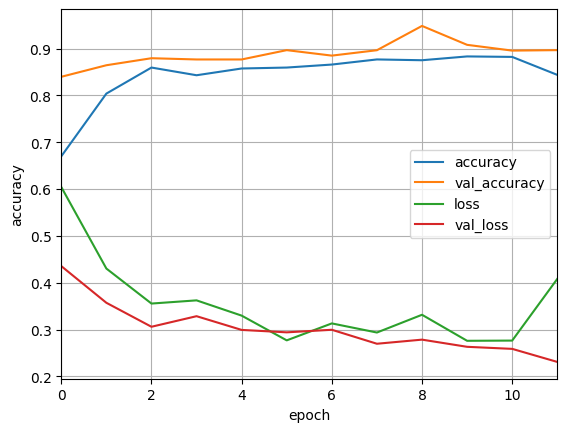

In [52]:
# summarize history for loss
# score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy of the VGG model = ', round(scores[1], 2), "\n")

# summarize history for loss
plt.plot(history_vgg16_12e.history['accuracy'])
plt.plot(history_vgg16_12e.history['val_accuracy'])
plt.plot(history_vgg16_12e.history['loss'])
plt.plot(history_vgg16_12e.history['val_loss'])
plt.xlim(0, 11)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()